In [1]:
import pandas as pd
import numpy as np
import requests,json, tweepy
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from PIL import Image
%matplotlib inline

### 收集数据

In [2]:
image_predictions = "https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv"

In [4]:
with open('image-predictions.tsv', 'wb') as f:
    f.write(requests.get(image_predictions).content)

In [2]:
consumer_key = '2GByMdAfZhc**************'
consumer_secret = '****************************OJINtVtEzOrCY7Q5g0NCNq'
access_token = '****************************dtTAhFHV3X4pYJpHFF9skK'
access_secret = '****************************azfYoSlWREio0gey5'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [3]:
tweet_ids = pd.read_csv('twitter-archive-enhanced.csv', usecols=[0])

In [4]:
tweet_list = tweet_ids.tweet_id.tolist()

In [6]:
f = open('tweet_json.txt', 'a')
for tweet_id in tweet_list:
    try:
        statu = api.get_status(tweet_id, tweet_mode='extended')
        json.dump(statu._json, f)
        f.write('\n')
    except:
        print()
f.close()
        

Rate limit reached. Sleeping for: 17


Rate limit reached. Sleeping for: 114


### 对项目数据进行评估

In [5]:
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')

In [6]:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [7]:
with open('tweet_json.txt') as f:
    lines = f.readlines()

In [8]:
tweet_json = pd.DataFrame(columns=('id', 'retweet_count', 'favorite_count'))

In [9]:
for line in lines:
    df = pd.io.json.json_normalize(json.loads(line))
    tweet_json = pd.concat([tweet_json, df], join='inner')

In [10]:
pd.options.display.max_columns=200
pd.options.display.max_colwidth=200

In [11]:
image_prediction.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [12]:
twitter_archive_enhanced.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/890729181411237888/photo/1,https://twitter.com/dog_rates/status/890729181411237888/photo/1",13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Zoey. She doesn't want to be one of the scary sharks. Just wants to be a snuggly pettable boatpet. 13/10 #BarkWeek https://t.co/9TwLuAGH0b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185150312448/photo/1,13,10,Zoey,None,None,None,None
9,89024025534

In [13]:
tweet_json.head(10)

,id,retweet_count,favorite_count
0,892420643555336193,8287,37950
0,892177421306343426,6119,32593
0,891815181378084864,4054,24539
0,891689557279858688,8416,41293
0,891327558926688256,9129,39484
0,891087950875897856,3035,19839
0,890971913173991426,2010,11599
0,890729181411237888,18383,64028
0,890609185150312448,4175,27249
0,890240255349198849,7190,31269


In [14]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
# in_reply_to_status_id ,in_reply_to_user_id,retweeted等总数太小，可以删除
# timestamp列不是date数据类型
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
# 把列名id改为tweet_id
# id列改为int类型
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2338 entries, 0 to 0
Data columns (total 3 columns):
id                2338 non-null object
retweet_count     2338 non-null object
favorite_count    2338 non-null object
dtypes: object(3)
memory usage: 73.1+ KB


In [17]:
# 狗的名字不应该是a，或者the
twitter_archive_enhanced.name.value_counts()

None         745
a             55
Charlie       12
Oliver        11
Lucy          11
Cooper        11
Tucker        10
Penny         10
Lola          10
Winston        9
Bo             9
Sadie          8
the            8
Toby           7
Bailey         7
Daisy          7
an             7
Buddy          7
Leo            6
Bella          6
Jack           6
Milo           6
Dave           6
Oscar          6
Scout          6
Jax            6
Rusty          6
Stanley        6
Koda           6
Alfie          5
            ... 
Jed            1
Biden          1
Rupert         1
Gordon         1
Loomis         1
Gerbald        1
Zeus           1
Tupawc         1
Skittles       1
Brownie        1
Franq          1
Ridley         1
Simba          1
Kanu           1
Gustav         1
Finnegus       1
Norman         1
Georgie        1
Enchilada      1
this           1
Kallie         1
Pinot          1
Doobert        1
Dex            1
Karl           1
Luther         1
Huxley         1
Rontu         

In [18]:
# 狗的地位信息有大量缺失
twitter_archive_enhanced.iloc[:,13:]

,doggo,floofer,pupper,puppo
0,None,None,None,None
1,None,None,None,None
2,None,None,None,None
3,None,None,None,None
4,None,None,None,None
5,None,None,None,None
6,None,None,None,None
7,None,None,None,None
8,None,None,None,None
9,doggo,None,None,None


In [19]:
# source列有过多无用html代码
twitter_archive_enhanced.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [20]:
# 评分的分母有时是10，有时不是，把它们统一成10
twitter_archive_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [21]:
# 有59张照片链接缺失
sum(twitter_archive_enhanced.expanded_urls.isnull())

59

In [22]:
# 有66张照片地址重复，可以删除
sum(image_prediction.jpg_url.duplicated())

66

In [23]:
twitter_archive_enhanced.in_reply_to_status_id[148].astype('int64')

863425645568774144

#### 质量问题

`twitter_archive_enhanced`

- 表中的空值不能是None
- 评分的分母有时是10，有时不是，分子实际上有小数的情况，需要重新抓取
- 狗的名字不应该是a,an,the
- 狗的地位信息有大量缺失
- source列有过多无用html代码
- 不需要包括转发的推文
- in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp总数太小，可以删除
- timestamp列不是date数据类型
- 有59张照片链接缺失，删除这些行

`image_prediction`

- 有66张照片地址重复，可以删除

`tweet_json`

- id,retweet_count, favorite_count列类型不是字符串
- 把id列名改为tweet_id

#### 整洁度问题

- 狗狗的地位不需要用四列(doggo,floofer,pupper,puppo)来表示,可以整合为一列
- `image_prediction`和`tweet_json`两表可以合并到`twitter_archive_enhanced`

### 清理数据

#### 质量问题

##### 表中的空值不能是None

###### 定义

先替换表中所有None为NaN

###### 代码

In [113]:
image_clean = image_prediction.copy()
twitter_clean = twitter_archive_enhanced.copy()
tweet_clean = tweet_json.copy()

In [114]:
 twitter_clean.replace('None', np.nan, inplace=True)

###### 测试

In [115]:
twitter_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1057,742150209887731712,NaN,NaN,2016-06-13 00:22:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Edmund. He sends stellar selfies. Cute af. 8/10 would totally snapchat with this pupper https://t.co/PprXoqZuKY,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742150209887731712/photo/1,8,10,Edmund,NaN,NaN,pupper,NaN
1778,677895101218201600,NaN,NaN,2015-12-18 16:56:01 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys this was terrifying. Really spooked me up. We don't rate ghosts. We rate dogs. Please only send dogs... 9/10 https://t.co/EJImi1udYb,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677895101218201600/photo/1,9,10,NaN,NaN,NaN,NaN,NaN
2220,668484198282485761,NaN,NaN,2015-11-22 17:40:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Good teamwork between these dogs. One is on lookout while other eats. Long necks. Nice big house. 9/10s good pups https://t.co/uXgmECGYEB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668484198282485761/photo/1,9,10,NaN,NaN,NaN,NaN,NaN
1496,692530551048294401,NaN,NaN,2016-01-28 02:12:04 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Cody. He's been to like 80 countries and is way more cultured than you. He wanted me to say that. 10/10 https://t.co/Iv3flDTpXu,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692530551048294401/photo/1,10,10,Cody,NaN,NaN,NaN,NaN
1444,696713835009417216,NaN,NaN,2016-02-08 15:14:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Trevith. He's a Swiss Mountain Roadwoof. Breeze too powerful. 9/10 stay strong pupper https://t.co/6J8Ibwy1X6,NaN,NaN,NaN,https://twitter.com/dog_rates/status/696713835009417216/photo/1,9,10,Trevith,NaN,NaN,pupper,NaN


##### 有59张照片链接缺失

###### 定义

只留下有照片的行

###### 代码

In [116]:
twitter_clean = twitter_clean[twitter_clean.expanded_urls.isnull() == False]

###### 测试

In [117]:
sum(twitter_clean.expanded_urls.isnull() == True)

0

##### 狗的地位信息有大量缺失

###### 定义

地位信息的4列都是分类信息，可以合并成一列，在最后整洁度问题中一起解决

###### 代码

In [118]:
twitter_clean = twitter_clean[twitter_clean.expanded_urls.isnull() == False]

In [119]:
twitter_clean[['doggo','floofer','pupper','puppo']].notnull().sum()

doggo       94
floofer     10
pupper     255
puppo       29
dtype: int64

In [120]:
stage = twitter_clean[['tweet_id','doggo','floofer','pupper','puppo']]

In [121]:
# 在后面整洁度问题一起解决
# twitter_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

##### 狗的名字不应该是a,an,the

###### 定义

将名字为a，an，the的狗name都换成空值

###### 代码

In [122]:
twitter_clean.name.replace('the', np.nan, inplace=True)
twitter_clean.name.replace('a', np.nan, inplace=True)
twitter_clean.name.replace('an', np.nan, inplace=True)

###### 测试

In [123]:
twitter_clean.name.value_counts()

Charlie         12
Lucy            11
Cooper          11
Oliver          11
Lola            10
Penny           10
Tucker          10
Bo               9
Winston          9
Sadie            8
Toby             7
Daisy            7
Buddy            7
Bailey           7
Stanley          6
Milo             6
Jack             6
Dave             6
Oscar            6
Scout            6
Bella            6
Koda             6
Leo              6
Rusty            6
Jax              6
Sammy            5
Sunny            5
Bentley          5
Oakley           5
George           5
                ..
Karma            1
Ester            1
Toffee           1
Sojourner        1
Milky            1
Timofy           1
Clifford         1
Kaia             1
Jackie           1
Bluebert         1
Birf             1
Gin              1
Clarq            1
Terrenth         1
Malikai          1
Ivar             1
Kota             1
Pubert           1
Glenn            1
Fletcher         1
Jazzy            1
Harnold     

##### source列有过多无用html代码

###### 定义

用正则表达式将html代码都从source中除去

###### 代码

In [124]:
twitter_clean.source = twitter_clean.source.str.extract('>(.+)<',expand = True)

###### 测试

In [125]:
twitter_clean.source.value_counts()

Twitter for iPhone     2163
Vine - Make a Scene      91
Twitter Web Client       32
TweetDeck                11
Name: source, dtype: int64

##### 不需要包括转发的推文

###### 定义

将转发推文的那些行删除

###### 代码

In [126]:
twitter_clean = twitter_clean[twitter_clean.retweeted_status_id.isnull() == True]

###### 测试

In [127]:
sum(twitter_clean.retweeted_status_id.isnull() == False)

0

##### in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp总数太小，可以删除

###### 定义

将in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp这些列删除

###### 代码

In [128]:
twitter_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

###### 测试

In [129]:
twitter_clean.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
699,786286427768250368,2016-10-12 19:24:27 +0000,Vine - Make a Scene,This is Arnie. He's afraid of his own bark. 12/10 would comfort https://t.co/ObT2tSxXit,https://vine.co/v/5XH0WqHwiFp,12,10,Arnie,NaN,NaN,NaN,NaN


##### timestamp列不是date数据类型

###### 定义

把timestamp列从str变成datetime变量

###### 代码

In [130]:
twitter_clean.timestamp = pd.to_datetime(twitter_clean.timestamp)

###### 测试

In [131]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2117 non-null int64
timestamp             2117 non-null datetime64[ns]
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  1426 non-null object
doggo                 84 non-null object
floofer               10 non-null object
pupper                232 non-null object
puppo                 24 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 215.0+ KB


##### 评分的分母有时是10，有时不是，分子实际上有小数的情况，需要重新抓取

*我在用正则表达式尝试提取text中分数并计数时发现了有的分子是小数，在这里没有体现出来*

###### 定义

先用正则表达式将分子和分母提取到一个dataframe中，因为会有小数的情况所以使用(?:\d+\.)捕获分子有小数情况的整数部分，分母应当是能被10整除的数，因为在发现问题时非10的倍数都不是正确的评分，有些是10的倍数是因为图中不止一条狗。
将提取出来的值放进twitter_clean中，把分子与分母相除的值给分子的列是因为这样可以让分子随着分母的变化而变化，而商不变。便可以把分母统一成10，不用一个一个去改了。

###### 代码

In [132]:
rating = twitter_clean.text.str.extract('((?:\d+\.)?\d+)\/([1-9]+[0]+)')

In [133]:
rating.columns = ['numerator', 'denominator']

In [134]:
rating.numerator.value_counts()

12       489
10       437
11       417
13       295
9        154
8         98
7         51
14        41
5         33
6         32
3         19
4         16
2          9
1          4
0          2
9.75       1
13.5       1
60         1
165        1
420        1
45         1
11.27      1
84         1
44         1
144        1
143        1
80         1
50         1
121        1
88         1
1776       1
99         1
11.26      1
204        1
Name: numerator, dtype: int64

In [135]:
twitter_clean.rating_numerator = twitter_clean.rating_numerator.astype('float');
twitter_clean.rating_numerator, twitter_clean.rating_denominator = rating.numerator.astype('float'), rating.denominator.astype('float')
twitter_clean.rating_numerator = twitter_clean.rating_numerator/twitter_clean.rating_denominator*10
twitter_clean.rating_denominator = 10

###### 测试

In [136]:
twitter_clean.rating_numerator.value_counts()

12.00      493
10.00      439
11.00      423
13.00      295
9.00       155
8.00        98
7.00        51
14.00       41
5.00        33
6.00        32
3.00        19
4.00        15
2.00        10
1.00         4
0.00         2
11.26        1
11.27        1
420.00       1
13.50        1
9.75         1
1776.00      1
Name: rating_numerator, dtype: int64

###### 代码

In [137]:
# 删除异常分数1776和420
twitter_clean.drop([979,2074],inplace=True)

###### 测试

In [138]:
twitter_clean.rating_numerator.value_counts()

12.00    493
10.00    439
11.00    423
13.00    295
9.00     155
8.00      98
7.00      51
14.00     41
5.00      33
6.00      32
3.00      19
4.00      15
2.00      10
1.00       4
0.00       2
9.75       1
13.50      1
11.27      1
11.26      1
Name: rating_numerator, dtype: int64

##### 有66张照片地址重复

###### 定义

将照片地址重复的行删除

###### 代码

In [139]:
image_prediction.jpg_url.drop_duplicates(inplace=True)

###### 测试

In [140]:
sum(image_prediction.jpg_url.duplicated())

0

##### id,retweet_count, favorite_count列类型不是字符串

###### 定义

这三列都应该是int类型，用astype将其改成int类型

###### 代码

In [141]:
tweet_clean.id = tweet_clean.id.astype('int64')
tweet_clean.retweet_count = tweet_clean.retweet_count.astype('int64')
tweet_clean.favorite_count = tweet_clean.favorite_count.astype('int64')

###### 测试

In [142]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2338 entries, 0 to 0
Data columns (total 3 columns):
id                2338 non-null int64
retweet_count     2338 non-null int64
favorite_count    2338 non-null int64
dtypes: int64(3)
memory usage: 73.1 KB


##### 把id列名改为tweet_id

###### 定义

跟其他两个表统一，把列名id改为tweet_id

###### 代码

In [143]:
tweet_clean.rename(columns={'id':'tweet_id'}, inplace=True)

###### 测试

In [144]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2338 entries, 0 to 0
Data columns (total 3 columns):
tweet_id          2338 non-null int64
retweet_count     2338 non-null int64
favorite_count    2338 non-null int64
dtypes: int64(3)
memory usage: 73.1 KB


#### 整洁度问题

##### 狗狗的地位不需要用四列(doggo,floofer,pupper,puppo)来表示,可以整合为一列

###### 定义

先从text中重新获取地位信息写入到stage列中，用floor的原因是在项目动机中说明了floof(er)，怕漏项，此时stage中得到的结果是一个list，需要转成字符串，lambda表达式的含义是，先将list去重，在依次用,拼接成字符串，set是防止(doggo,doggo)的情况出现。再将表中的空字符串变为空值NaN

In [154]:
# 示例
a = ['doggo','doggo']
b = ['doggo','doggo']
a = ','.join(set(a))
b = ','.join(b)

In [155]:
a

'doggo'

In [156]:
b

'doggo,doggo'

###### 代码

In [148]:
twitter_clean['stage'] = twitter_clean.text.str.findall('doggo|floof|pupper|puppo')

In [149]:
twitter_clean['stage'] = twitter_clean['stage'].apply(lambda x: ','.join(set(x)))

In [150]:
twitter_clean.replace('', np.nan, inplace=True)

###### 测试

In [151]:
twitter_clean.stage.value_counts()

pupper          240
doggo            75
puppo            27
floof            23
doggo,pupper      8
puppo,doggo       2
Name: stage, dtype: int64

##### 解决前面的质量问题，删除'doggo','floofer','pupper','puppo'4列

In [152]:
twitter_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

###### 测试

In [153]:
twitter_clean.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
1461,694925794720792577,2016-02-03 16:49:55,Vine - Make a Scene,Please only send in dogs. This t-rex is very scary. 5/10 ...might still pet (vid by @helizabethmicha) https://t.co/Vn6w5w8TO2,https://vine.co/v/iJvUqWQ166L,5.0,10,NaN,NaN


##### `image_prediction`和`tweet_json`两表可以合并到`twitter_archive_enhanced`

###### 定义

都是用推特id观察的特征列，将image表和tweet表用内连接的方式拼接到twitter_archive表中，减少图表中空值的情况

In [157]:
twitter_archive_master = pd.merge(twitter_clean, image_clean, on='tweet_id', how='inner')

In [158]:
twitter_archive_master = pd.merge(twitter_archive_master, tweet_clean, on='tweet_id', how='inner')

In [159]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1989 entries, 0 to 1988
Data columns (total 22 columns):
tweet_id              1989 non-null int64
timestamp             1989 non-null datetime64[ns]
source                1989 non-null object
text                  1989 non-null object
expanded_urls         1989 non-null object
rating_numerator      1988 non-null float64
rating_denominator    1989 non-null int64
name                  1376 non-null object
stage                 345 non-null object
jpg_url               1989 non-null object
img_num               1989 non-null int64
p1                    1989 non-null object
p1_conf               1989 non-null float64
p1_dog                1989 non-null bool
p2                    1989 non-null object
p2_conf               1989 non-null float64
p2_dog                1989 non-null bool
p3                    1989 non-null object
p3_conf               1989 non-null float64
p3_dog                1989 non-null bool
retweet_count         1989 non-

In [160]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

### 提出问题

- 评分高低和点赞数的关系
- 评分高低和转发数的关系
- 地位不同跟人们喜欢程度的关系
- 点赞超过平均数的狗中，什么品类的狗狗最多

### 见解

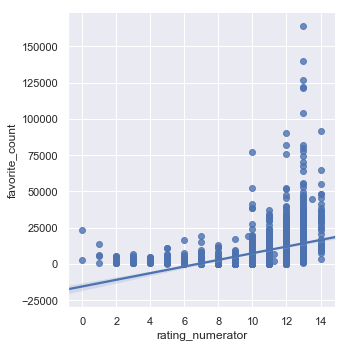

In [163]:
sns.set(style="darkgrid")
sns.lmplot(x='rating_numerator', y='favorite_count',data = twitter_archive_master)
plt.show();

点赞和评分呈现正相关性

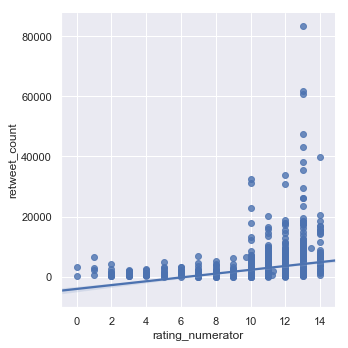

In [164]:
sns.set(style="darkgrid")
sns.lmplot(x='rating_numerator', y='retweet_count',data = twitter_archive_master)
plt.show();

转发和评分呈正相关性

In [165]:
stage_favorite = twitter_archive_master.groupby(['stage']).mean().favorite_count

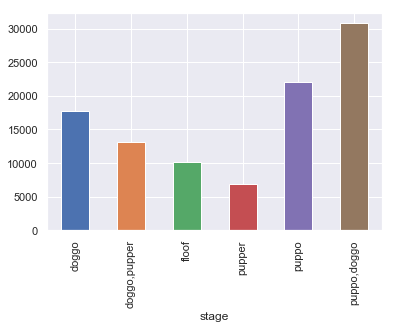

In [166]:
stage_favorite.plot(kind='bar');

人们最喜欢doggo与puppo地位的狗，最不受欢迎的是pupper地位的狗

### 可视化

In [167]:
fav_mean = twitter_archive_master.favorite_count.mean()
variety = twitter_archive_master[twitter_archive_master.favorite_count >= fav_mean]
data = variety.groupby(['p1']).count()

In [168]:
data = data.tweet_id.sort_values(ascending=False)

In [169]:
variety_dict = data.to_dict()

In [170]:
dog_image = np.array(Image.open('dog_white.jpg'))

In [171]:
wc = WordCloud(background_color="white", max_words=200, mask=dog_image)

In [172]:
wc.generate_from_frequencies(variety_dict);

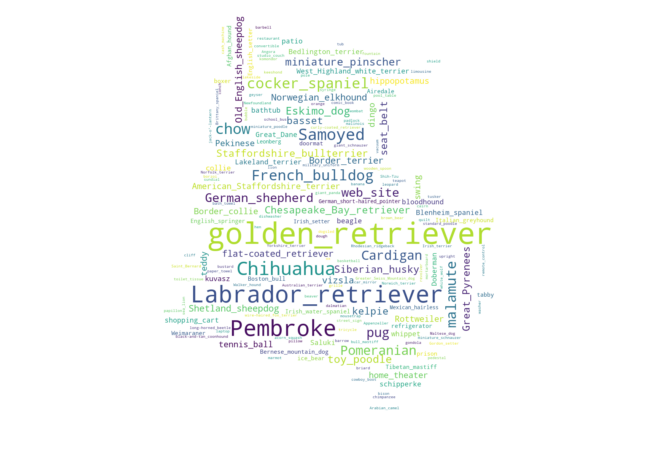

In [175]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.rcParams['figure.figsize'] = (30.0, 8.0)
plt.show()

In [176]:
data.head()

p1
golden_retriever      66
Labrador_retriever    38
Pembroke              34
Chihuahua             23
Samoyed               16
Name: tweet_id, dtype: int64

人们最喜欢且最常看到的狗狗种类是golden_retriever